### Homework 11: Clustering - https://github.com/fedhere/PUI2016_fb55/tree/master/HW11_fb55
Author: fhl204

In [3]:
from __future__ import print_function
import numpy as np
import pandas as pd
import pylab as pl
import os
%pylab inline
import geopandas as gpd
from geopandas import GeoDataFrame

from fiona.crs import from_epsg
import shapely
from shapely.geometry import Point

import seaborn
from descartes import PolygonPatch

os.getenv("PUIDATA")

Populating the interactive namespace from numpy and matplotlib


/opt/rh/anaconda/root/envs/PUI2016_Python2/lib/python2.7/site-packages/IPython/html.py:14: ShimWarning: The `IPython.html` package has been deprecated. You should import from `notebook` instead. `IPython.html.widgets` has moved to `ipywidgets`.
  "`IPython.html.widgets` has moved to `ipywidgets`.", ShimWarning)


'/home/cusp/fhl204/PUIdata'

In [4]:
#load Census Tract Shape File: nycb2010_16d
os.system("curl -O http://www1.nyc.gov/assets/planning/download/zip/data-maps/open-data/nycb2010_16d.zip") 
os.system("mv " + "nycb2010_16d.zip " + os.getenv("PUIDATA")+"/nycb2010_16d.zip")
os.system("unzip " + os.getenv("PUIDATA")  + "/nycb2010_16d.zip -d " + os.getenv("PUIDATA"))
os.system("rm " + os.getenv("PUIDATA") + "/nycb2010_16d.zip")

0

In [5]:
shape_path = os.getenv("PUIDATA") + '/nycb2010_16d/nycb2010.shp'
ct_shape = GeoDataFrame.from_file(shape_path)

In [6]:
ct_shape.head()

,BCTCB2010,BoroCode,BoroName,CB2010,CT2010,Shape_Area,Shape_Leng,geometry
0,50009001000,5,Staten Island,1000,000900,244589.603884,2508.948115,"POLYGON ((962269.1260375977 173705.5001831055,..."
1,50020011000,5,Staten Island,1000,002001,111006.286826,1345.886422,"POLYGON ((964642.2676391602 161835.2651977539,..."
2,50027001000,5,Staten Island,1000,002700,150406.766022,1703.381172,"POLYGON ((963363.1168212891 167356.3336181641,..."
3,50040001000,5,Staten Island,1000,004000,141296.561149,1511.173743,"POLYGON ((960069.9965820312 161953.6936035156,..."
4,50064001000,5,Staten Island,1000,006400,200784.983607,1978.243852,"POLYGON ((963023.891784668 158246.7521972656, ..."


In [7]:
ct_latlon = ct_shape[ct_shape.BoroName == 'Brooklyn']

In [8]:
ct_latlon = ct_latlon.to_crs(epsg=4326)
cusp_coor = [-73.9866, 40.6931]

In [9]:
cusp_shapely_geometry = Point(cusp_coor)

In [10]:
for i in ct_latlon.index:
    if shapely.geometry.asShape(ct_latlon.geometry[i]).contains(cusp_shapely_geometry):
        index = i
        ct = ct_latlon.geometry[i]
        print('CUSP is contained in', ct)

CUSP is contained in POLYGON ((-73.98622595691906 40.69308831343839, -73.98627231669103 40.6921947946671, -73.98729894947923 40.69223407543156, -73.98725396415627 40.69312490276504, -73.98622595691906 40.69308831343839))


In [11]:
ct_latlon_10 = ct_latlon.iloc[::10]

In [12]:
ct_shape.crs = from_epsg(4326) # epsg=4326: lat/on | 26918: NAD83/UTM zone 18N | epsg=2263 is US feet
NYC_Area = ct_shape.to_crs(epsg=2263).geometry.area.sum()/(2.788*10**7) # from ft2 to mi2 
# from ft2 to mi2 #epsg=2263 is US feet

# a view of the shape file loaded as a geojson file will look like this. Notice the coordinates. They are in 
# epsg=2263 is US feet. You want to convert them in epsg=4326: lat/on . 
# Look at the notebook https://github.com/fedhere/PUI2016_fb55/blob/master/Lab9_SRK325/GeospatialAnalysis_CitiBike.ipynb
ct_shape.head()

,BCTCB2010,BoroCode,BoroName,CB2010,CT2010,Shape_Area,Shape_Leng,geometry
0,50009001000,5,Staten Island,1000,000900,244589.603884,2508.948115,"POLYGON ((962269.1260375977 173705.5001831055,..."
1,50020011000,5,Staten Island,1000,002001,111006.286826,1345.886422,"POLYGON ((964642.2676391602 161835.2651977539,..."
2,50027001000,5,Staten Island,1000,002700,150406.766022,1703.381172,"POLYGON ((963363.1168212891 167356.3336181641,..."
3,50040001000,5,Staten Island,1000,004000,141296.561149,1511.173743,"POLYGON ((960069.9965820312 161953.6936035156,..."
4,50064001000,5,Staten Island,1000,006400,200784.983607,1978.243852,"POLYGON ((963023.891784668 158246.7521972656, ..."


Plot one every 10 polygons of brooklyn (using the geopandas datafame method plot) and overplot the locati`on of cusp as a point (using pylab.scatter) Overplot also the census track that contains cusp in red (using the geopandas datafame method plot)

(40.56, 40.74)

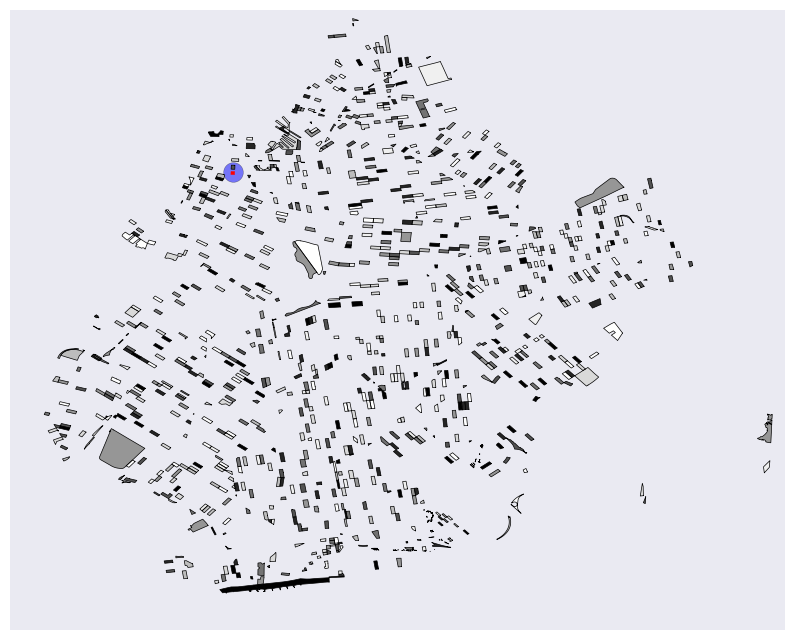

In [29]:

fig, ax = pl.subplots(figsize=(10,8))
ax.get_xaxis().set_visible(False)
ax.get_yaxis().set_visible(False)
ct_latlon_10.geometry.plot(cmap='Greys', alpha=1, linewidth=0.5, ax=ax)
ax.scatter(cusp_shapely_geometry.x, cusp_shapely_geometry.y, c='blue', alpha=0.5, s=200)
ct_patch = PolygonPatch(ct, fc='red', ec='red', alpha=1)
ax.add_patch(ct_patch)
ax.set_xlim(-74.05, -73.83)
ax.set_ylim(40.56, 40.74)

### Figure 1: Plot of every 10 polygons in Brooklyn with CUSP in Blue and the Census Tract in Red